In [3]:
# --------------------------------------------
# PART 1: Descriptive Analytics for Numerical Columns
# --------------------------------------------

# Use your laptop path directly
data_path = r"C:\Users\abhin\Downloads\sales_data_with_discounts (2).csv"

import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(data_path)

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_df = df[numeric_cols]

print("Numeric Columns:", numeric_cols)

# Basic descriptive statistics
desc = numeric_df.describe().T

# Add additional metrics
desc["variance"] = numeric_df.var()
desc["median"] = numeric_df.median()
desc["skewness"] = numeric_df.skew()
desc["kurtosis"] = numeric_df.kurt()

# First mode for each column
modes_first = {col: (numeric_df[col].mode().iloc[0] if not numeric_df[col].mode().empty else np.nan)
               for col in numeric_cols}
desc["mode_first"] = pd.Series(modes_first)

print("\n--- Descriptive Analytics Summary ---")
display(desc)

# Missing values
print("\n--- Missing Values in Numerical Columns ---")
missing = numeric_df.isnull().sum()
display(missing[missing > 0])


Numeric Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

--- Descriptive Analytics Summary ---


,count,mean,std,min,25%,50%,75%,max,variance,median,skewness,kurtosis,mode_first
Volume,450.0,5.066667,4.231602,1.000000,3.000000,4.000000,6.000000,31.000000,1.790646e+01,4.000000,2.731724,10.258547,3.000000
Avg Price,450.0,10453.433333,18079.904840,290.000000,465.000000,1450.000000,10100.000000,60100.000000,3.268830e+08,1450.000000,1.908873,2.075655,400.000000
Total Sales Value,450.0,33812.835556,50535.074173,400.000000,2700.000000,5700.000000,53200.000000,196400.000000,2.553794e+09,5700.000000,1.534729,1.024916,24300.000000
Discount Rate (%),450.0,15.155242,4.220602,5.007822,13.965063,16.577766,18.114718,19.992407,1.781348e+01,16.577766,-1.062294,-0.178541,5.007822
Discount Amount,450.0,3346.499424,4509.902963,69.177942,460.459304,988.933733,5316.495427,25738.022194,2.033922e+07,988.933733,1.913038,3.831186,69.177942
Net Sales Value,450.0,30466.336131,46358.656624,326.974801,2202.208645,4677.788059,47847.912852,179507.479049,2.149125e+09,4677.788059,1.540822,1.012468,326.974801



--- Missing Values in Numerical Columns ---


Series([], dtype: int64)

Numeric Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Categorical Columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


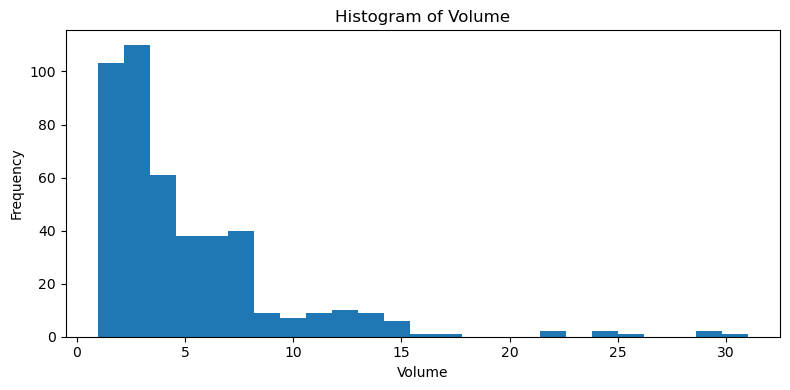

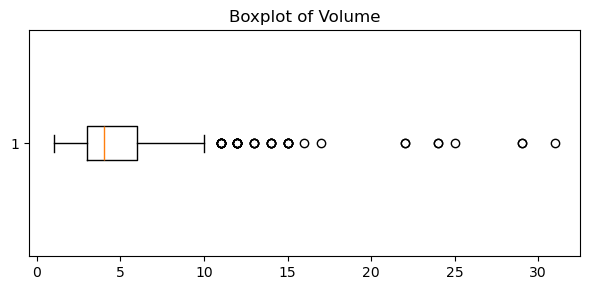

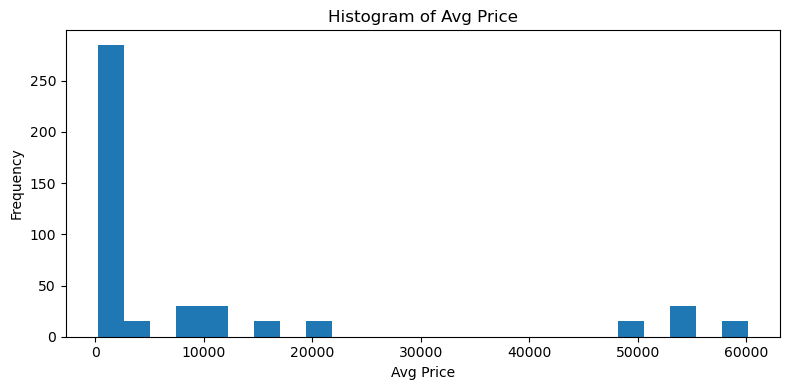

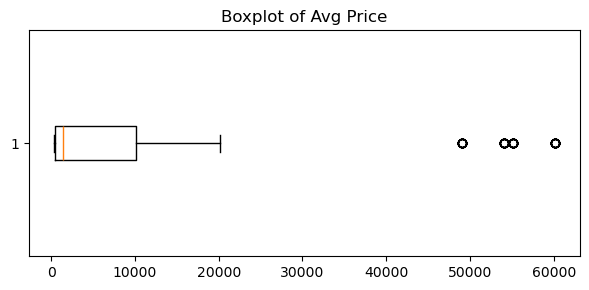

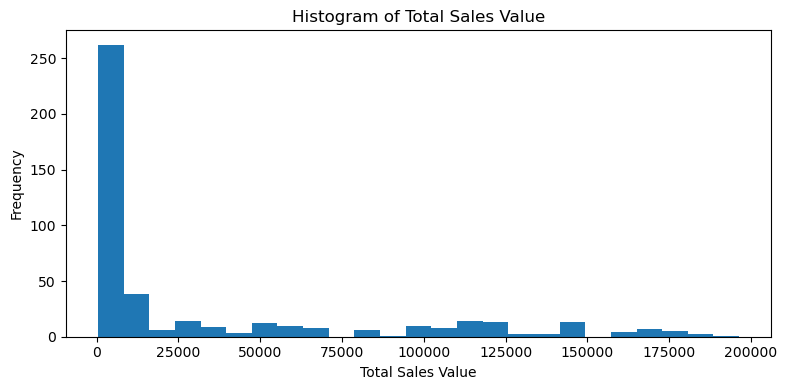

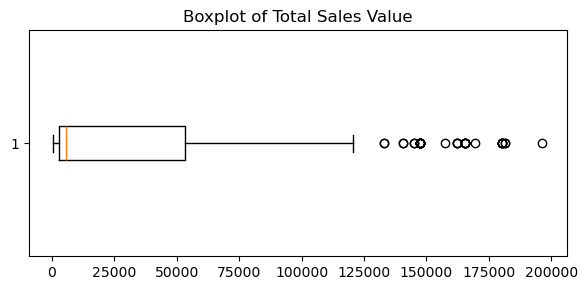

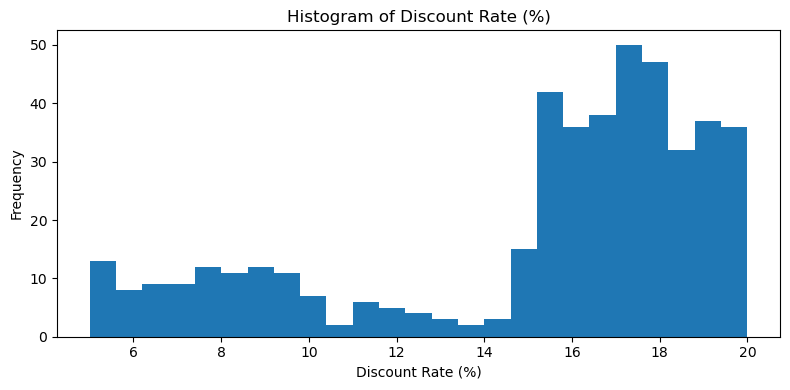

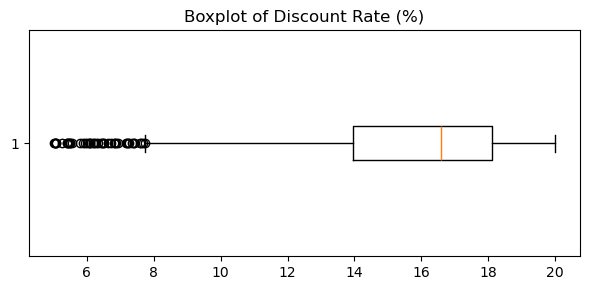

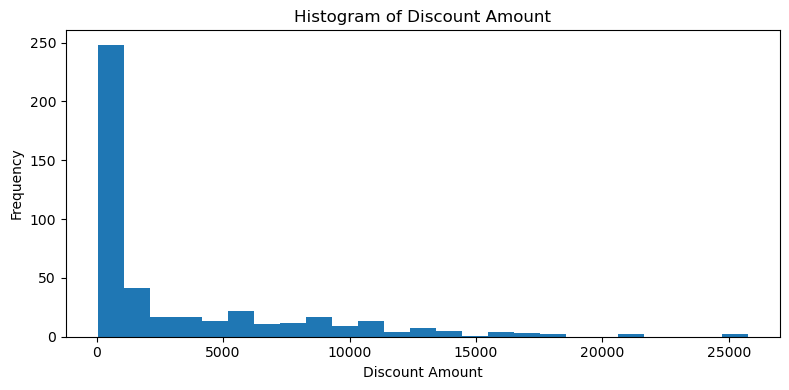

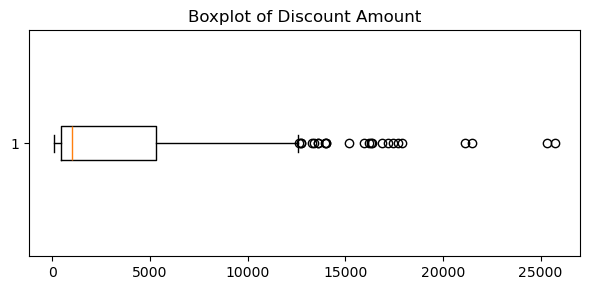

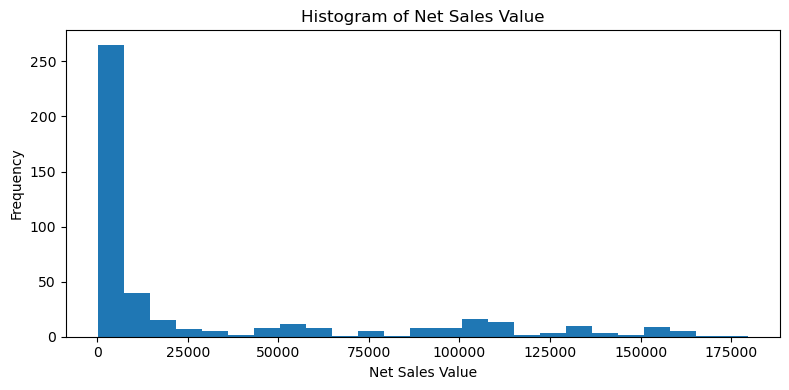

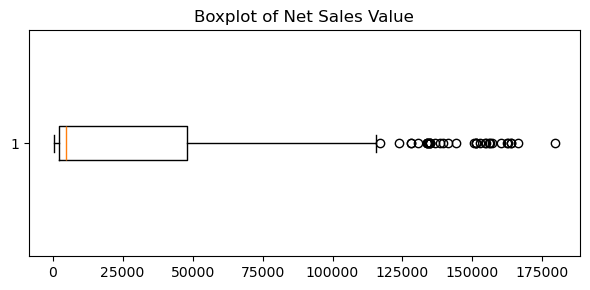

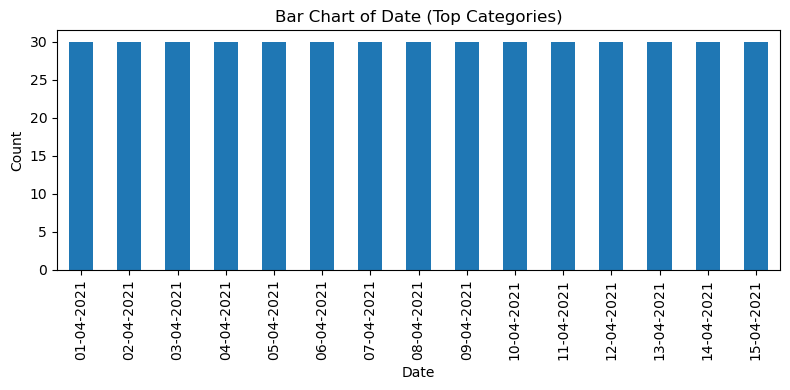

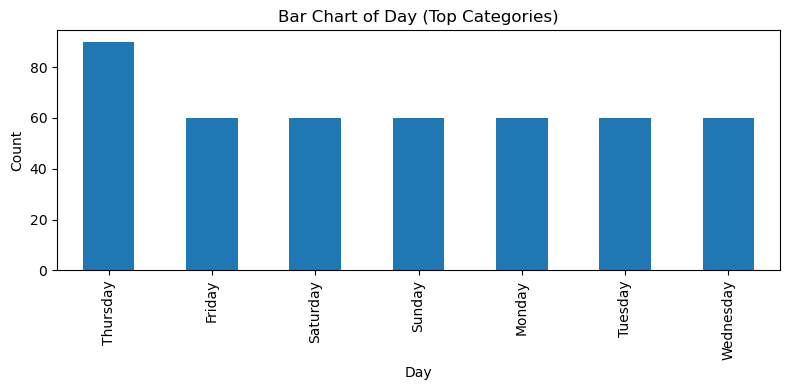

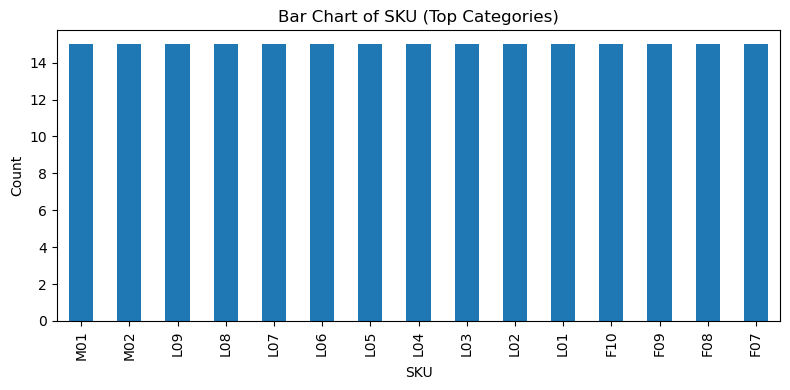

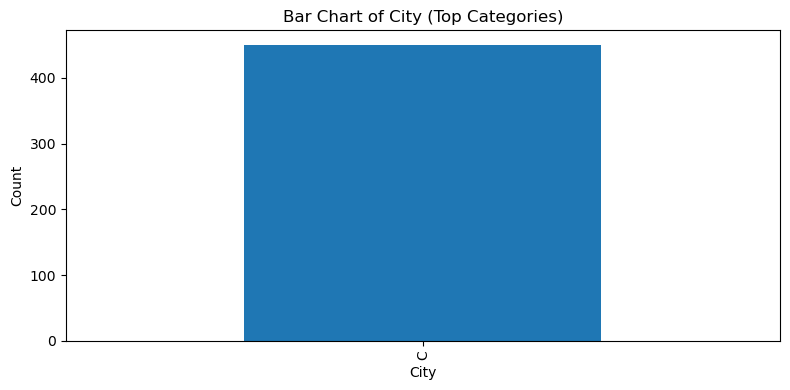

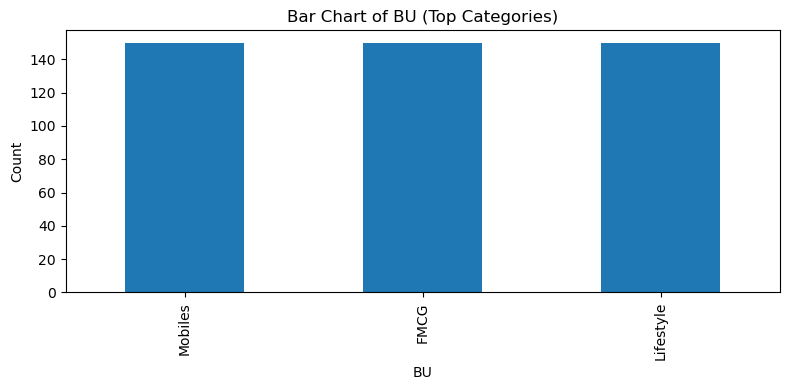

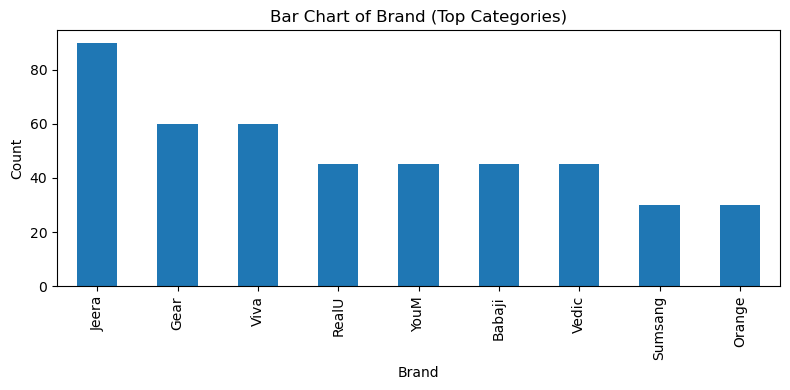

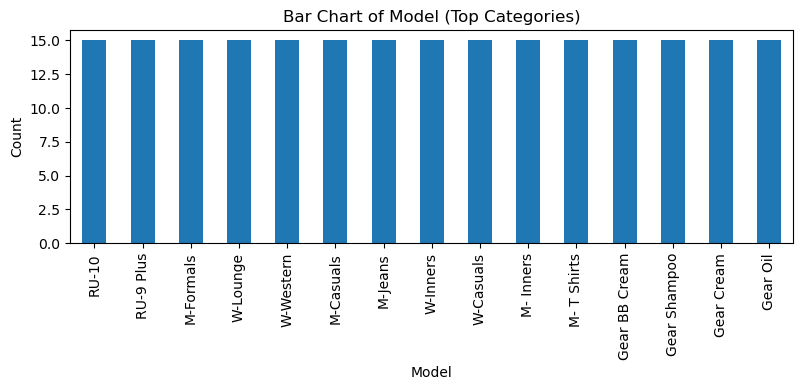

In [4]:
# --------------------------------------------
# PART 2: Data Visualization
# --------------------------------------------

import matplotlib.pyplot as plt
import os

# (Optional) save plots to a folder on your laptop
plots_dir = r"C:\Users\abhin\Downloads\plots_assignment_03"
os.makedirs(plots_dir, exist_ok=True)

# Identify numeric & categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

# -------------------------------
# 1. Histograms & Boxplots for Numerical Columns
# -------------------------------
for col in numeric_cols:
    # Histogram
    plt.figure(figsize=(8,4))
    plt.hist(df[col].dropna(), bins=25)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(f"{plots_dir}/hist_{col}.png")
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.savefig(f"{plots_dir}/box_{col}.png")
    plt.show()

# -------------------------------
# 2. Bar Charts for Categorical Columns
# -------------------------------
for col in categorical_cols:
    vc = df[col].value_counts().head(15)   # Top 15 categories
    plt.figure(figsize=(8,4))
    vc.plot(kind='bar')
    plt.title(f"Bar Chart of {col} (Top Categories)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(f"{plots_dir}/bar_{col}.png")
    plt.show()
